In [16]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import h5py
import os
import time

from util import *
from data_loader import * 
import scdd as sd

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
dataset={}
dataname = ['brain9k','brain1k','PBMC8k','PBMC68k','brain2k','brain1.3m']
dataset['brain9k'] = load_10x_9k() ## 9k brain cells 
dataset['brain1k'] = load_10x_1k() ## 1k brain cells 
dataset['PBMC8k'] = load_10x_8k() ## 8k PBMC cells 
dataset['PBMC68k'] = load_10x_68k() ## 68k PBMC cells 
dataset['brain2k'] = load_10x_2k() ## 2k brain cells 
dataset['brain1.3m'] = load_10x_1_3mil() ## 1.3 million brain cells 

In [34]:
dataset['brain1.3m'] = load_10x_1_3mil()
print(dataset['brain1.3m'])

MemoryError: 

In [6]:
dataset['brain2k'] = load_10x_2k()
print(dataset['brain2k'])

AnnData object with n_obs × n_vars = 2022 × 27998 


In [7]:
dataset['brain9k'] = load_10x_9k()
print(dataset['brain9k'])

AnnData object with n_obs × n_vars = 9128 × 27998 


In [8]:
dataset['brain1k'] = load_10x_1k()
print(dataset['brain1k'])

AnnData object with n_obs × n_vars = 931 × 27998 


In [12]:
dataset['PBMC68k'] = load_10x_68k()
print(dataset['PBMC68k'])

AnnData object with n_obs × n_vars = 68579 × 32738 


In [14]:
dataset['PBMC8k'] = load_10x_8k()
print(dataset['PBMC8k'])

AnnData object with n_obs × n_vars = 8381 × 33694 


In [17]:
dataset['PBMC4k'] = load_10x_4k()
print(dataset['PBMC4k'])

AnnData object with n_obs × n_vars = 4340 × 33694 


In [19]:
dataset.keys()

dict_keys(['brain2k', 'brain9k', 'brain1k', 'PBMC68k', 'PBMC8k', 'PBMC4k'])

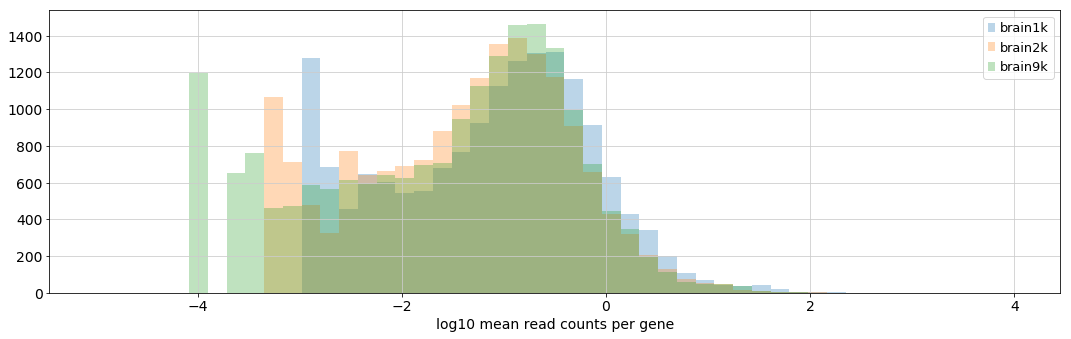

In [32]:
## generate a mean sequencing depth plot 
plt.figure(figsize=[18,5])
bins = np.linspace(-5,4,50)
for dname in ['brain1k','brain2k','brain9k']:
    data = dataset[dname].copy()
    sc.pp.filter_genes(data,min_counts=0.0001*data.shape[0])
    mean_g = np.array(data.X.mean(axis=0),dtype=float).reshape(-1)
    plt.hist(np.log10(mean_g),alpha=0.3,bins=bins,label=dname)
plt.xlabel('log10 mean read counts per gene')
plt.legend()
plt.show()

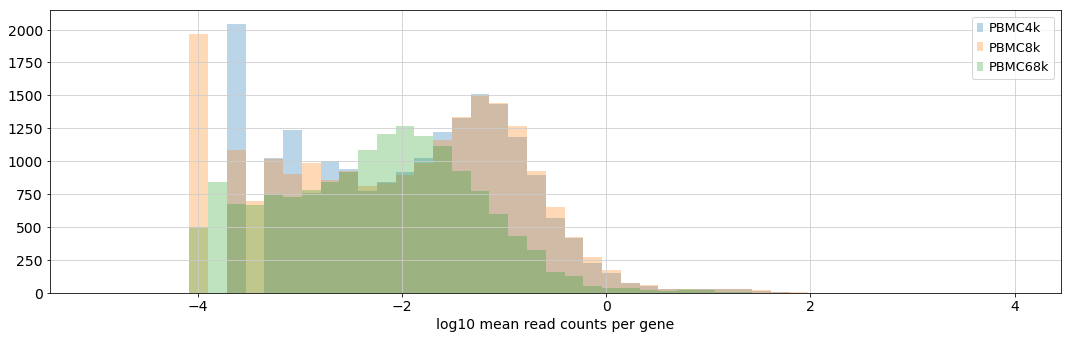

In [33]:
## generate a mean sequencing depth plot 
plt.figure(figsize=[18,5])
bins = np.linspace(-5,4,50)
for dname in ['PBMC4k','PBMC8k','PBMC68k']:
    data = dataset[dname].copy()
    sc.pp.filter_genes(data,min_counts=0.0001*data.shape[0])
    mean_g = np.array(data.X.mean(axis=0),dtype=float).reshape(-1)
    plt.hist(np.log10(mean_g),alpha=0.3,bins=bins,label=dname)
plt.xlabel('log10 mean read counts per gene')
plt.legend()
plt.show()